<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Aranzazú Rendón Gómez, Diego Pintor.
    
**Fecha:** 16 de marzo del 2021.

**Expediente:** 722272, .
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 8: Clase 14

## Enunciado Tarea
### Liga repo: 
https://github.com/Aranzazu-R/Tareas7y8_RendonA_PintorD.git

# <font color = red> Tarea
**Esta tarea incluye el ejercicio dejado en la clase anterior**
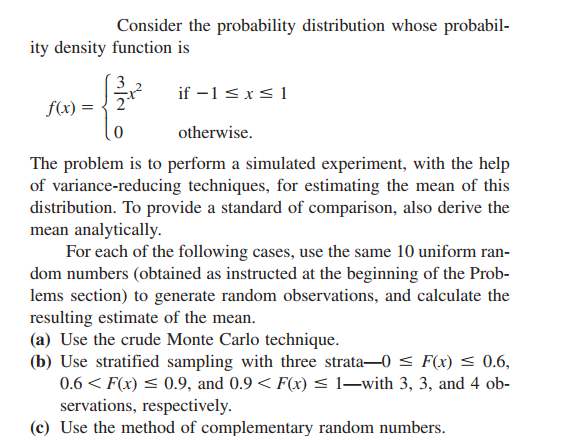
Además use el método de estratificación donde se divide en B estratos, visto la clase pasada y compare el resultado con los métodos anteriores cuando se toman $2,4,6,10$ estratos respectivamente, concluya.

**Ejercicio clase pasada**
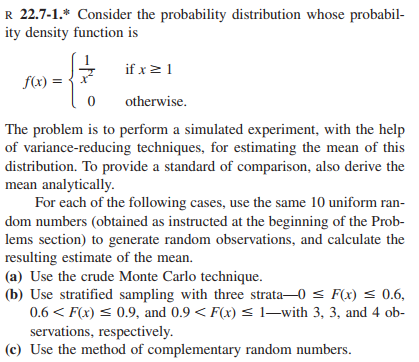

In [1]:
import numpy as np
from functools import reduce
import time
import matplotlib.pyplot as plt
import scipy.stats as st     # Librería estadística
import pandas as pd
from scipy import optimize

### Respuesta Pintor

**Ejercicio clase pasada:**

1. Derivando la media analíticamente

Sabemos que la media de una distribución de probabilidad continua es:
$$E[(x)]=\int_{0}^{x} xf(x)dx$$
Entonces:
$$E[\frac{1}{x^2}]=\int_{1}^{\infty}x\frac{1}{x^2}dx$$
$$E[\frac{1}{x^2}]=\int_{1}^{\infty}\frac{1}{x}dx$$
$$E[\frac{1}{x^2}]=[\ln{x}]_{1}^{\infty}$$
$$E[\frac{1}{x^2}]=[\ln{\infty}]-[\ln{1}]$$
$$E[\frac{1}{x^2}]=\infty$$

2. Obteniendo la función inversa para generar variables aleatorias


$$F(x)=\int_{1}^{x}\frac{1}{x^2}dx $$
$$F(x)=[-\frac{1}{x}]_{1}^{x}$$
$$F(x)=1-\frac{1}{x}$$
$$U =1-\frac{1}{x}$$
$$x =\frac{1}{1-U}$$

In [32]:
# Ejercicio
# Cantidad de términos
N = 10
#fx = lambda x:1/x**2 if x>=1 else 0 función original, por si acaso
# Función inversa
f_inv = lambda u:1/(1-u)

# MÉTODOS PARA APROXIMAR LA MEDIA DE LA DISTRIBUCIÓN 
# 1. Montecarlo crudo
mcarlo = f_inv(np.random.rand(N)).mean()
print("Aproximación de la media mediante Montecarlo crudo",mcarlo)

# 2. Método muestreo estratificado 
# Generador de estratos muestreados
def estratos(s: "Tamaño del estrato",a: "Inicio del intervalo",b: "Inicio del intervalo", N: "Número de términos", f: "Función"):
    w = (s/N)/(b-a)
    return f(np.random.uniform(a,b,s)/w)

#Primer estrato, 3 observaciones de 0 a 0.6
est1 = estratos(3,0,0.6,N,f_inv)
#Segundo estrato, 3 observaciones de 0.6 a 0.9
est2 = estratos(3,0.6,0.9,N,f_inv)
#Tercer estrato, 4 observaciones de 0.9 a 1
est3 = estratos(4,0.9,1,N,f_inv)
mest = np.concatenate([est1,est2,est3]).mean()
print("Aproximación de la media mediante muestreo estratificado",mest)
# 3. Método números complementarios
# Partiendo el intervalo en 2
int1 = np.random.rand(int(N/2))
int2 = 1-int1
mcomp = (f_inv(int1).mean() + f_inv(int2).mean())/2
print("Aproximación de la media mediante números complementarios",mcomp)

Aproximación de la media mediante Montecarlo crudo 6.615930829805888
Aproximación de la media mediante muestreo estratificado 0.1885902655028851
Aproximación de la media mediante números complementarios 5.903922846020907


### Respuesta Aranzazú

Derivada analítica de la media:
$$E[x]=\int_{1}^{x} x f(x) dx$$
$$E[x]=\int_{1}^{x} \frac{x}{x^2} dx = [\ln{x}]_{1}^{x} = x$$

Función inversa:
$$G[x]=\int_{1}^{x} \frac{1}{x^2}dx$$

$$G[x]=[\frac{-1}{x}]_{1}^{x} = \frac{-1}{x}-1$$

$$\frac{-1}{x}-1 = U$$
$$\frac{-1}{x} = U+1$$
$$x = \frac{1}{-U+1}$$

In [3]:
np.random.seed(556)
N = 10
# Programar función h(x)
h = lambda x: (1/x**2) if x >= 1 else 0
fun_inv = lambda u: 1/(1-u) 

# A) MONTECARLO CRUDO
u1 = np.random.uniform(0,1,N)
monte_crudo = np.mean(list(map(fun_inv, u1))) #evalua h en todos los numeros u1
print('Media usando montecarlo crudo=',monte_crudo)

# B) MONTECARLO ESTRATIFICADO
# Estratos
r1 = np.random.uniform(0, 0.6, 3)
r2 = np.random.uniform(0.6, 0.9, 3)
r3 = np.random.uniform(0.9, 1, 4)
r = [r1, r2, r3]
w = [((3/10)/(0.6-0)), ((3/10)/(0.9-0.6)), ((4/10)/(1-0.9))] #pesos

xi = [np.array([fun_inv(i)for i in ri]) for ri in r]
muestras = np.concatenate(list(map(lambda u,wi: u/wi ,xi, w)))

print('Media usando montecarlo estratificado=',muestras.mean())

# C) NUMEROS COMPLEMENTARIOS 
ri = np.random.rand(N)
# Números aleatorios complementarios
ri_c = np.random.rand(int(N/2))
xi_c = 1 - ri_c
# Media de observaciones complementarias
m_comple = np.mean(list(map(fun_inv, np.concatenate([ri_c, xi_c]))))
print('Media de observaciones usando el metodo de numeros complementarios = ', m_comple)

Media usando montecarlo crudo= 3.153070865902253
Media usando montecarlo estratificado= 5.065582475639839
Media de observaciones usando el metodo de numeros complementarios =  3.1445089966577764


## Tarea
1. Derivando la media analíticamente

$$E[\frac{3}{2} x^2]=\int_{-1}^{1} x\frac{3}{2} x^2dx$$
$$E[\frac{3}{2} x^2]=\int_{-1}^{1} \frac{3}{2} x^3dx$$
$$E[\frac{3}{2} x^2]=[\frac{3}{8}x^4]_{-1}^{1}$$
$$E[\frac{3}{2} x^2]=\frac{3}{8}-\frac{3}{8}$$
$$E[\frac{3}{2} x^2]=0$$

2. Obteniendo la función inversa para generar variables aleatorias


$$F(x)=\int_{-\infty}^{\infty}\frac{3}{2}x^2dx $$
$$F(x)=\int_{-\infty}^{-1}0dx+\int_{-1}^{0}\frac{3}{2}x^2dx+\int_{0}^{1}\frac{3}{2}x^2dx+ \int_{1}^{\infty}0dx $$
$$F(x)=[\frac{1}{2}x^3]_{-1}^{x}+[\frac{1}{2}x^3]_{x}^{1}$$
$$F(x)=\frac{1}{2}(x^3+1),-1\leq x \leq 0$$
$$F(x)=\frac{1}{2}(1-x^3),0\leq x \leq 1 $$
$$x =(2U-1)^\frac{1}{3},-1\leq x \leq 0$$
$$x =(1-2U)^\frac{1}{3},0\leq x \leq 1$$

In [37]:
# Ejercicio
# Cantidad de términos
N = 10
# Función inversa, como generamos a partir de uniformes 0,1, solo tomaremos una mitad de la inversa
f_inv = lambda u: np.cbrt(2*u-1)

# MÉTODOS PARA APROXIMAR LA MEDIA DE LA DISTRIBUCIÓN 
# 1. Montecarlo crudo
mcarlo = f_inv(np.random.rand(N)).mean()
print("Aproximación de la media mediante Montecarlo crudo",mcarlo)

# 2. Método muestreo estratificado 
# Generador de estratos muestreados
def estratos(s: "Tamaño del estrato",a: "Inicio del intervalo",b: "Inicio del intervalo", N: "Número de términos", f: "Función"):
    w = (s/N)/(b-a)
    return f(np.random.uniform(a,b,s)/w)

#Primer estrato, 3 observaciones de 0 a 0.6
est1 = estratos(3,0,0.6,N,f_inv)
#Segundo estrato, 3 observaciones de 0.6 a 0.9
est2 = estratos(3,0.6,0.9,N,f_inv)
#Tercer estrato, 4 observaciones de 0.9 a 1
est3 = estratos(4,0.9,1,N,f_inv)
mest = np.concatenate([est1,est2,est3]).mean()
print("Aproximación de la media mediante muestreo estratificado",mest)
# 3. Método números complementarios
# Partiendo el intervalo en 2
int1 = np.random.rand(int(N/2))
int2 = 1-int1
mcomp = (f_inv(int1).mean() + f_inv(int2).mean())/2
print("Aproximación de la media mediante números complementarios",mcomp)
# 4. Usando estratos uniformes B
# Partiendo de la función de la tarea 7
def estratificar(N: 'Número de estratos a crear'):
    """
    Función creadora de estratos para el método de estratificación. Recibe N número de estratos a crear.
    Crea 3 variables para el método de estratificación (U + i)/B, donde B es la cantidad total de estratos a crear,
    i es la variable iterable sobre los B estratos totales y U es la variable aleatoria uniforme a estratificar.
    Regresa un array con las variables aleatorias estratificadas.
    """
    B = np.array([j for j in N]) # B estratos
    i = np.array([np.arange(0,j) for j in N]) # Iteración sobre los estratos
    U = np.array([np.random.rand(j) for j in N])  # Variables aleatorias uniformes de N términos
    return (U + i)/B
estratos = [2,4,6,10]
mcarlo_strat = np.array([f_inv(np.random.rand(j)).mean() for j in estratos])
mcarlo_strat

Aproximación de la media mediante Montecarlo crudo 0.1439442686988225
Aproximación de la media mediante muestreo estratificado -0.02683470582487051
Aproximación de la media mediante números complementarios 0.0


array([-0.1208781 ,  0.77887619,  0.19429566,  0.43856472])

### Respuesta Aranzazú

Derivada analítica de la media:
$$E[x]=\int_{-1}^{1} x f(x) dx$$
$$E[x]=\int_{-1}^{1} \frac{3}{2} x^3dx = [\frac{3}{8}x^4]_{-1}^{1} = 0$$

Función inversa:
$$G[x]=\int_{x}^{1} \frac{3}{2} x^2dx + \int_{-1}^{x} \frac{3}{2} x^2dx$$

$$G[x]=\frac{3}{2} \int_{x}^{1}x^2dx + \frac{3}{2} \int_{-1}^{x}x^2dx$$

$$G[x]=\frac{3}{2} [\frac{x^3}{3}]_{x}^{1} + \frac{3}{2} [\frac{x^3}{3}]_{-1}^{x}$$

$$G[x]=[\frac{x^3}{2}]_{x}^{1} + [\frac{x^3}{2}]_{-1}^{x}$$

Para $0 < x < 1$:
$$G[x]=\frac{1}{2}-\frac{x^3}{2}$$
$$\frac{1}{2}- \frac{x^3}{2} = U$$
$$x = (1-2U)^{\frac{1}{3}}$$

Para $-1 < x < 0$:
$$G[x]=\frac{x^3}{2}-\frac{-1}{2}$$
$$\frac{x^3}{2}- \frac{-1}{2} = U$$
$$x = (2U-1)^{\frac{1}{3}}$$

In [2]:
np.random.seed(556)
N = 10
# Programar función h(x)
h = lambda x: ((3/2)*x**2) if -1 <= x <= 1 else 0
fun_inv = lambda u: np.cbrt(1-2*u) if 0<u<1 else np.cbrt(2*u-1)

# A) MONTECARLO CRUDO
u1 = np.random.uniform(0,1,N)
monte_crudo = np.mean(list(map(fun_inv, u1))) #evalua h en todos los numeros u1
print('Media usando montecarlo crudo=',monte_crudo)

# B) MONTECARLO ESTRATIFICADO
# Estratos
r1 = np.random.uniform(0, 0.6, 3)
r2 = np.random.uniform(0.6, 0.9, 3)
r3 = np.random.uniform(0.9, 1, 4)
r = [r1, r2, r3]
w = [((3/10)/(0.6-0)), ((3/10)/(0.9-0.6)), ((4/10)/(1-0.9))] #pesos

xi = [np.array([fun_inv(i)for i in vi]) for vi in r]
muestras = np.concatenate(list(map(lambda u,wi: u/wi ,xi, w)))

print('Media usando montecarlo estratificado=',muestras.mean())

# C) NUMEROS COMPLEMENTARIOS 
ri = np.random.rand(N)
# Números aleatorios complementarios
ri_c = np.random.rand(int(N/2))
xi_c = 1 - ri_c
# Media de observaciones complementarias
m_comple = np.mean(list(map(fun_inv, np.concatenate([ri_c, xi_c]))))
print('Media de observaciones usando el metodo de numeros complementarios = ', m_comple)

Media usando montecarlo crudo= 0.1233104625954728
Media usando montecarlo estratificado= 0.014351496983725842
Media de observaciones usando el metodo de numeros complementarios =  5.551115123125783e-18


Analíticamente descubrimos que la media real es igual a 0, por lo tanto el mejor método es el de los numeros complementarios.


